# Project: Investigate a Dataset: No-Show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of characteristics about the patient are included in each row.

### Dataset Description 
<ul>
    <li>PatientId: indicates the patient ID</li>
    <li>AppointmentID: indicates id of the appointment patient reserved</li>
    <li>Gender: indicates patient's sex it should be one of these two values (M/F)</li>
    <li>ScheduledDay: indicates which Date/Time the patient come to reserve appointment.<\li>
    <li>AppointmentDay indicates the date/time the patient called to book their appointment.</li>
    <li>Age: indicates the patient's age.</li>
    <li>Neighborhood: indicates the location of the hospital.</li>
    <li>Scholarship: indicates if patient enrolled in welfare program or not.</li>
    <li>Hipertension: indicates if patient have or not.</li>
    <li>Diabetes: indicates if the patient have or not.</li>
    <li>Alcoholism: indicates if the patient have or not.</li>
    <li>Handcap: indicates if patient has special needs or not.</li>
    <li>SMS_received: indicates if patient recieves reminder text message or not.</li>
    <li>Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>

### Question(s) for Analysis
what factors are importnat to predict whether the patient will show up for appointment or not?

In [2]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as snb
%matplotlib inline 

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.7MB/s eta 0:00:01  4% |█▋                              | 512kB 12.3MB/s eta 0:00:01    10% |███▍                            | 1.1MB 23.5MB/s eta 0:00:01    16% |█████▍                          | 1.8MB 8.0MB/s eta 0:00:02    35% |███████████▍                    | 3.7MB 28.6MB/s eta 0:00:01    54% |█████████████████▎              | 5.7MB 12.6MB/s eta 0:00:01    86% |███████████████████████████▊    | 9.1MB 28.8MB/s eta 0:00:01


<a id='wrangling'></a>
## Data Wrangling
we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Rename columns to be lowercase and put _ between words to make it simple to call columns

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace('-','_'), inplace=True)

In [5]:
#check for duplicated rows
df.duplicated().sum()

0

There is no duplication in rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we need to change scheduledday, appointmentday to datetime instead of string

In [7]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


we want to check whether patient id is unique or duplicated

In [9]:
df['patientid'].duplicated().sum()

48228

there is 48228 duplicated IDs

we want to check if duplicated patients ids have same situation (show - no show)

In [10]:
df.duplicated(['patientid', 'no_show']).sum()

38710

there is 38710 patient ids with same situation, so it is not useful to keep them all so we will delete them

In [11]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min age is -1 which is wrong. there is no person has -1 age, so we will remove it

In [12]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

There is no null values


### Data Cleaning

First, we need to remove row its age value = -1

In [13]:
df.drop(df[df['age']==-1].index,inplace= True)
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we need to remove duplicated patient id with same situattion(no-show)

In [14]:
df.drop_duplicates(['patientid', 'no_show'], inplace = True)
df.shape

(71816, 14)

In [15]:
#remove unnecessary columns (these columns will not make difference in our analysis)
df.drop(['patientid', 'appointmentid'], axis=1, inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning and trimming our data, we will explore and ask questions for analysis

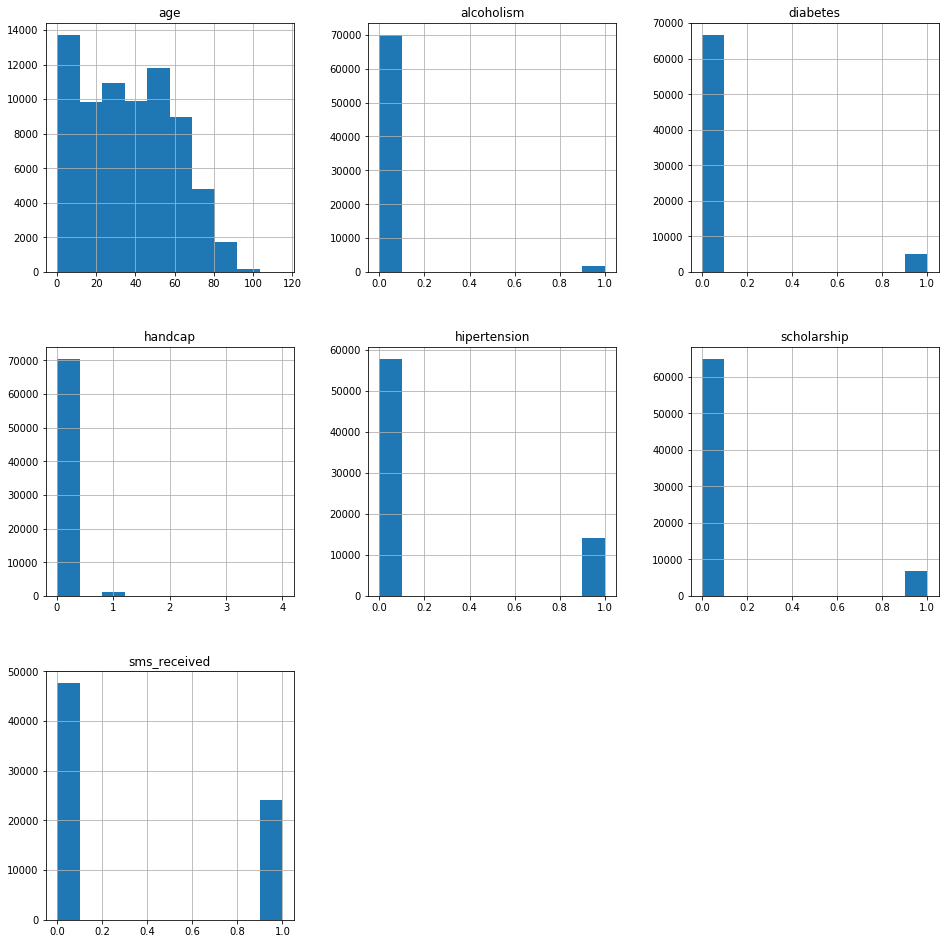

In [16]:
#now we will look generally columns. making histograms for every column 
df.hist(figsize=(16, 16.5));

In [17]:
#dividing dataframe to two two groups one for show patient and other for no-show patient
show_pat = df.no_show == 'No' 
no_show_pat = df.no_show == 'Yes'
print(df[show_pat].count())
print(df[no_show_pat].count())

gender            54153
scheduledday      54153
appointmentday    54153
age               54153
neighbourhood     54153
scholarship       54153
hipertension      54153
diabetes          54153
alcoholism        54153
handcap           54153
sms_received      54153
no_show           54153
dtype: int64
gender            17663
scheduledday      17663
appointmentday    17663
age               17663
neighbourhood     17663
scholarship       17663
hipertension      17663
diabetes          17663
alcoholism        17663
handcap           17663
sms_received      17663
no_show           17663
dtype: int64


patient who showed patients is 3 times equal to no-showed patients 

### Research Question 1  (if age affect attendance or not)

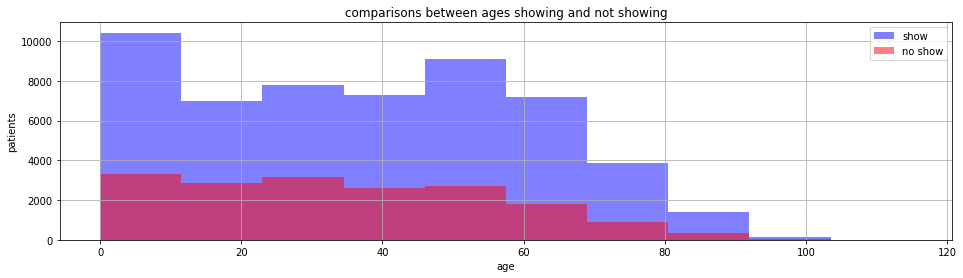

In [18]:
def plot_Two(df, col, para1, para2, xlabel, ylabel, title):
    plt.figure(figsize = [16, 4])
    df[col][para1].hist(alpha = 0.5, color = 'blue', label='show')
    df[col][para2].hist(alpha = 0.5, color = 'red', label = 'no show')
    plt.legend();
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
plot_Two(df, 'age', show_pat, no_show_pat, 'age', 'patients', 'comparisons between ages showing and not showing')

children are more in attending in their appointments then 45:55.
<br/>
people with high age are least care about their health

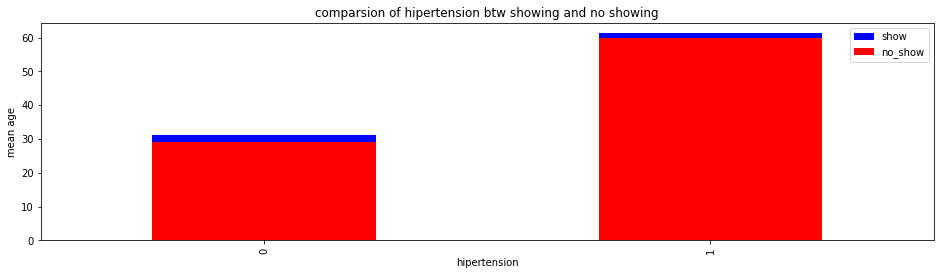

In [30]:
#showing if hypertension affect attendance
def plot_bar(df, pro, col, att1, att2, title):
    plt.figure(figsize=[16, 4])
    df[att1].groupby(pro).mean()[col].plot(kind = 'bar', color = 'blue', label='show')
    df[att2].groupby(pro).mean()[col].plot(kind = 'bar', color = 'red', label = 'no_show')
    plt.ylabel('mean age');
    plt.legend()
    plt.title(title)

plot_bar(df, 'hipertension', 'age', show_pat, no_show_pat, 'comparsion of hipertension btw showing and no showing')

most people of hipertension does not show, avg age of attended people = 60 

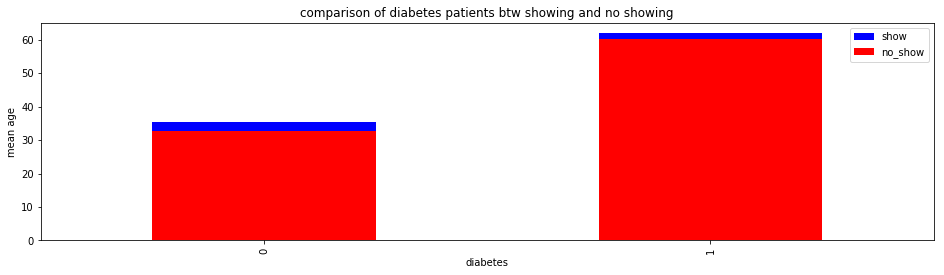

In [31]:
#showing if diabetes affect attendance

plot_bar(df, 'diabetes', 'age', show_pat, no_show_pat, 'comparison of diabetes patients btw showing and no showing')

most people of diabtes does not show, avg age of attended people = 60

diabetes and hipertension does not affect showing of patients

### Research Question 2  (Whether males or females show up more)

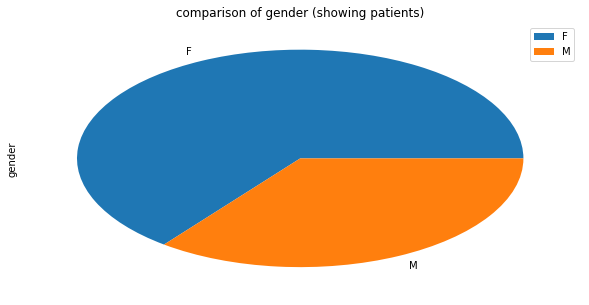

In [32]:
def pie_plot(df, col, att, title):
    plt.figure(figsize=[10, 5])
    df[col][att].value_counts(normalize=True).plot(kind='pie')
    plt.legend();
    plt.title(title)
    
# show patients
pie_plot(df, 'gender', show_pat, 'comparison of gender (showing patients)');

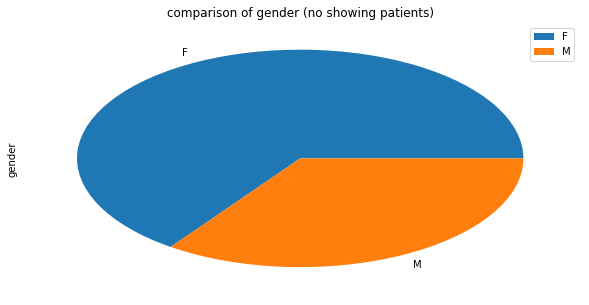

In [33]:
# no_show patients
pie_plot(df, 'gender', no_show_pat, 'comparison of gender (no showing patients)');

gender is not good parameter to analysis data with

### Research Question 3  (Whether day of week affect showing)

In [34]:
# here we are trying to make new column called weekday to know if day affect showing or not
df['weekday'] = df['appointmentday'].dt.day_name()
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,weekday
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


here we made new column called weekday to know if weekday affect showing or not

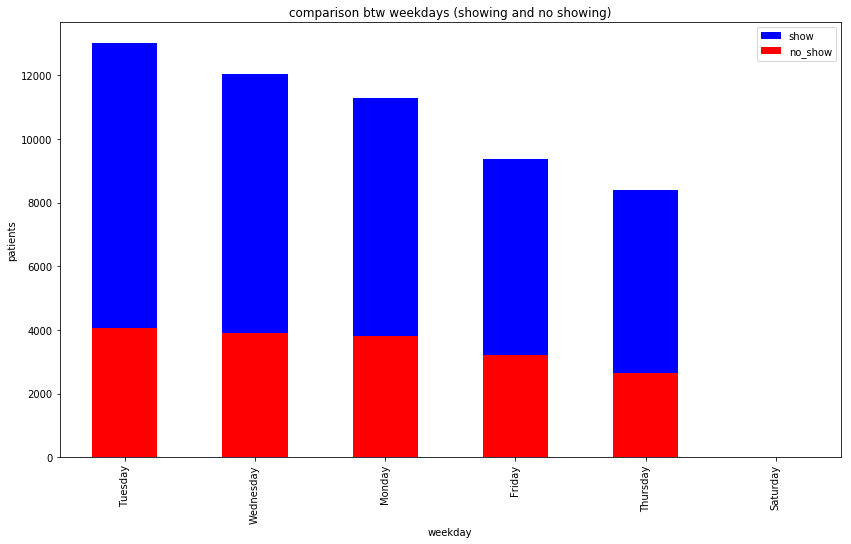

In [35]:
def plot_value(df, col, par1, par2, title):
    plt.figure(figsize = [14, 8])
    df[col][par1].value_counts().plot(kind = 'bar', color = 'blue', label = 'show')
    df[col][par2].value_counts().plot(kind = 'bar', color = 'red', label = 'no_show')
    plt.legend()
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('patients');
    
plot_value(df, 'weekday', show_pat, no_show_pat, 'comparison btw weekdays (showing and no showing)')

we see that almost no patient show on week end <br/>
we see that the most day patient shows is tuesday <br/>
no of patients no show in tuesday-wednesday-monday almost equal

### Research Question 4  (Whether neighbourhood affect showing or not)

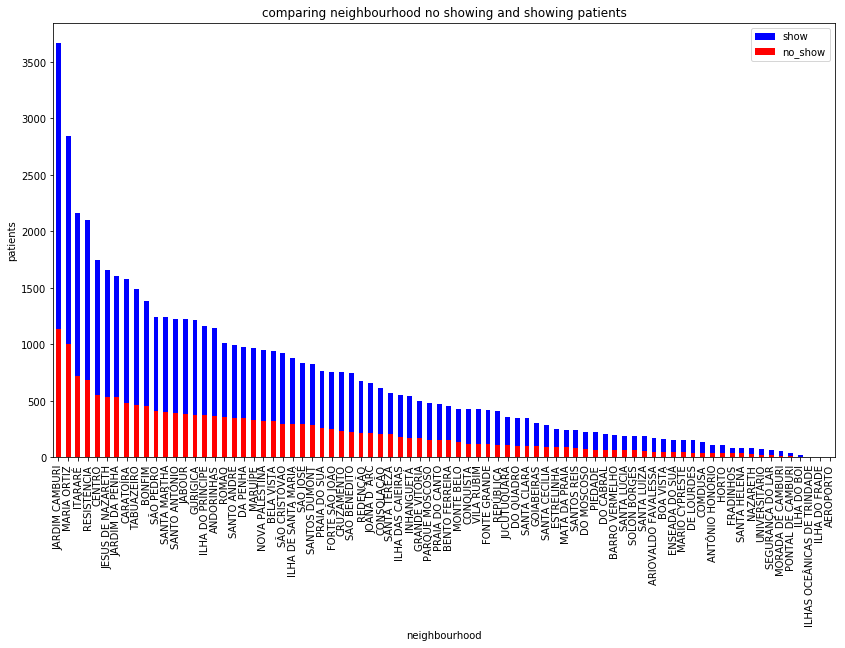

In [36]:
plot_value(df, 'neighbourhood', show_pat, no_show_pat, 'comparing neighbourhood no showing and showing patients')

we see that most showing neighbourhood is JARDIM CAMBURl <br/>

to know if age and neighbourhood affect shwoing or not

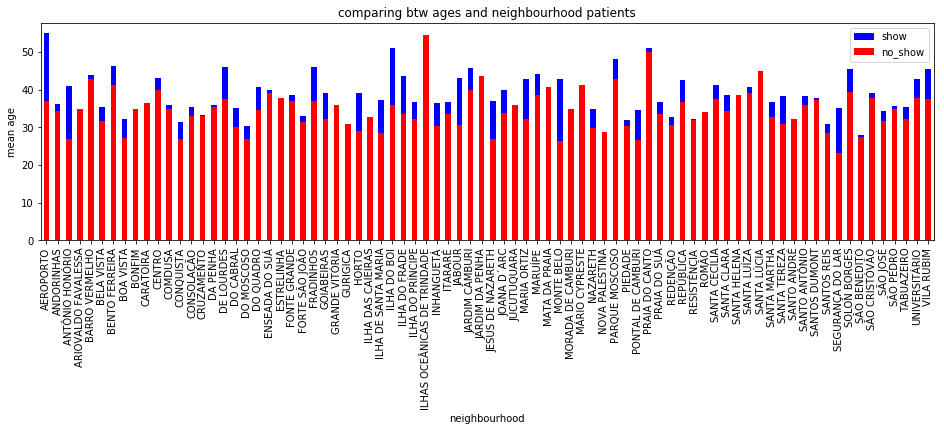

In [37]:
plot_bar(df, 'neighbourhood', 'age', show_pat, no_show_pat, 'comparing btw ages and neighbourhood patients')

we notice that avg age differs in different neighbourhoods 
<br/> we see that there is neighbourhood with high age and people does not show

<a id='conclusions'></a>
## Conclusions
-we see that age affect showing <br/>
children are most patients showing but high age patients are most patients no showing (45 - 60) <br/>
<br/>
-we see diabtes and hipertension do not affect our analysis <br/>
<br/>
-we see gender does not affect our analysis <br/>
<br/>
-we see that week day affect showing <br/>
in weekends patients does not show <br/>
most day patients show is Tuesday <br/>
<br/>
-we see that neighbourhood affect showing of patient <br/>
the most neighbourhood attend is JARDIM CAMBURl <br/>
we notice that avg age differs in different neighbourhoods, we see that there is neighbourhood with high age and people does not show.

<br/>

## Limitations 
gender, hipertension and diabetes do not have effect on showing <br/>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0